## Dimensionality Reduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
# I need an approach for clustering ...

In [3]:
outcome = 'y_Dwsce'#'y_wsce'
treatment = 'redufl'
optimisation_metric = 'neg_mean_squared_error'
evaluation_metrics = ('r2','neg_mean_squared_error')
log_outcome=False
cross_val_cache = "data/cross-val-all.pkl"
bootstrap_cache = "data/bootstrap-all.pkl"
data_file = "all_vars.csv"

In [4]:
from reed import drop_missing_treatment_or_outcome
from direct_regression import seperate_and_transform_data

data = pd.read_csv(data_file,index_col='xwaveid')
drop_missing_treatment_or_outcome(data, treatment, outcome)
if log_outcome:
    data[outcome] = np.log(data[outcome]+data[outcome].min())
    
X0, X1, y0, y1, X, y, t, features = seperate_and_transform_data(data, treatment, outcome)

Dropped 592 rows missing treatment or outcome.


In [6]:
def effective_rank(X):
    """
    Return the effective rank of a matrix
    
    Based on: Roy, Olivier, and Martin Vetterli. 
    "The effective rank: A measure of effective dimensionality." 
    In 2007 15th European Signal Processing Conference, 2007.
    """
    u, s, v = np.linalg.svd(X.T@X)
    norm_s = np.abs(s).sum()
    p = s/norm_s
    H = -(p*np.log(p)).sum()
    erank = np.exp(H)
    return erank

for M in [X0, X1, X]:
    print(M.shape[1], effective_rank(M))

638 313.3365680181785
638 267.35867449148515
638 325.66965705212874


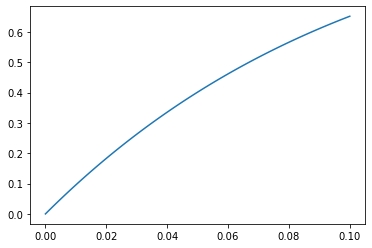

In [26]:

# 97

# if I roll a d100 10 times, what is the probability of getting at least one 1

# if the probability of getting 1 is x then probabity of not getting 1 for  each roll is (1-x)^10


x = np.linspace(0,.1,100)
plt.plot(x,1-(1-x)**10)


In [16]:
from skfeature.function.sparse_learning_based import NDFS,UDFS,MCFS

W = UDFS.udfs(X, n_clusters=10)

In [18]:
W.shape

(638, 10)

In [19]:
X.shape

(4954, 638)

array([-6.63952625e-08, -3.57639239e-08, -6.49137349e-08,  1.36195746e-08,
        4.32986679e-09,  1.02609452e-08, -1.02929833e-08,  3.35138550e-09,
        1.07036817e-08,  1.96074203e-08])